In [2]:
import torch
import matplotlib.pyplot as plt

# **RELU**

Stands for Rectified Linear Unit, most common activation function.

**Formula** - f(z) = max(0, z)

In [6]:
def relu(x: float) -> float:
  return max(0, x)

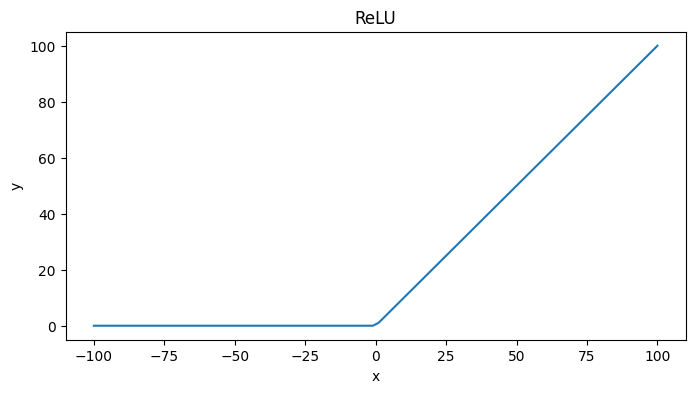

In [15]:
x = torch.linspace(-100,100,100, dtype = torch.float)
y = torch.relu(x)

plt.figure(figsize=(8,4))
plt.plot(x,y)
plt.title("ReLU")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

ReLU is most common choice amongst hidden layers because-

1. Computationally very cheap as it just takes max. Makes training faster.

2. Mitigates vanishing gradients problem common in very deep networks since its derivative is either 1 if z > 0 or 0. Since the derivative remains constant it doesn't shrink as it passes through many layers.

**Dying ReLU Problem** - Suppose the weights get updated in such a way that all the the preactivation score turns out to be negative. Applying ReLU makes it 0. And since the derivative of ReLU at this point is 0 too, no gradient flows through the neuron. So next layers recieves a 0 too and thus learning stops. This is mitigated via small learning rates.

In PyTorch, we can use torch.relu or torch.nn.ReLU

A common variant of ReLU is LeakyReLU which allows a small non zero gradient at negative input.

In [30]:
def LeakyReLU(x: list) -> list:
  y = []
  for i in x:
    y.append(max(0.01*i, i))
  return y

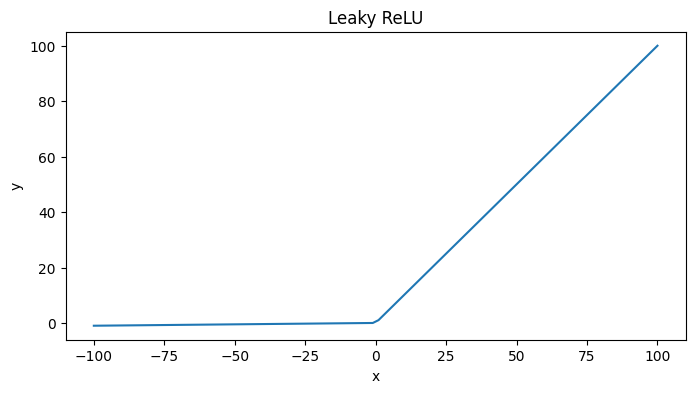

In [31]:
x = torch.linspace(-100,100,100, dtype = torch.float)
y = LeakyReLU(x)

plt.figure(figsize=(8,4))
plt.plot(x,y)
plt.title("Leaky ReLU")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# **SIGMOID**

Squishes output between 0 and 1.

**Formula -** sigma(x) = 1/(1 + exp(-x))

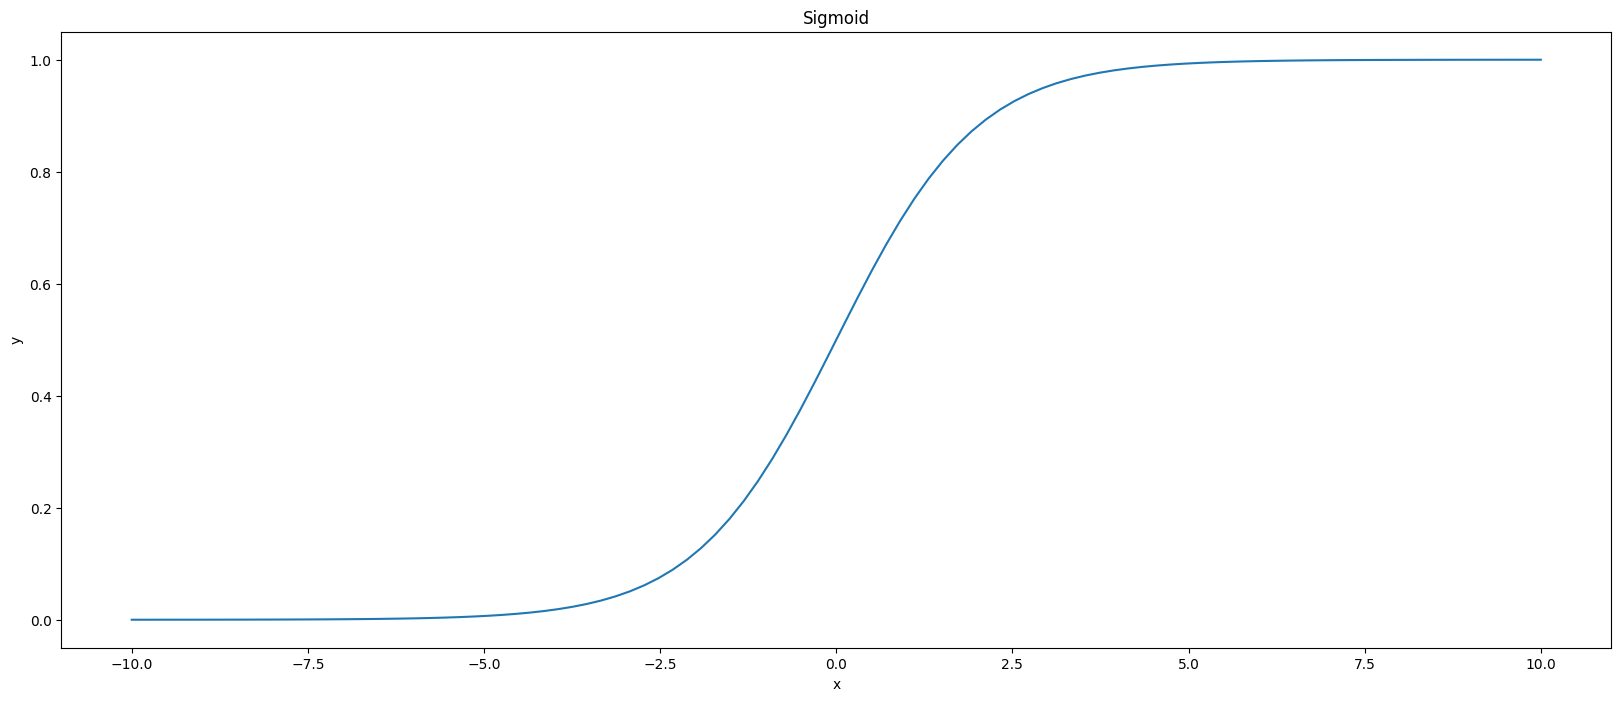

In [35]:
x = torch.linspace(-10,10,100)
y = torch.sigmoid(x)

plt.figure(figsize=(20,8))
plt.plot(x,y)
plt.title("Sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Most commonly used in binary classifiers but not in hidden layers usually. Has the vanishing gradients problem - Gradient is only meaningful in range [-3,3]. Outside this, gradient is near 0. So in a deep network if preactivation score is too large or too small no gradients flow through it. Also, since output is always > 0, it isnt centered around 0. This causes inefficient zig zag steps in gradient descent.

# **HYPERBOLIC TANGENT**

tanh(x) = (exp(x) - exp(-x))/(exp(x) + exp(-x))

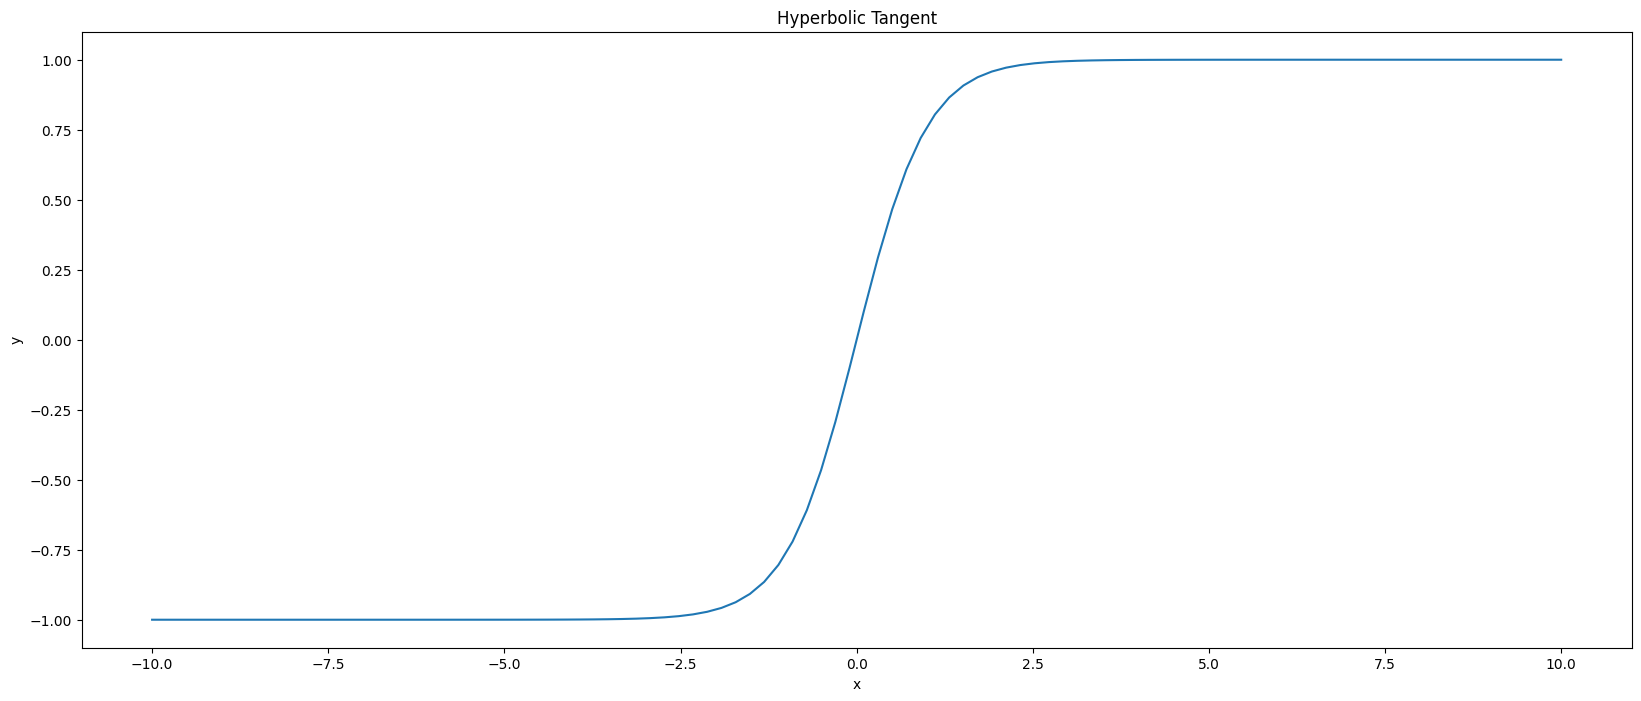

In [36]:
x = torch.linspace(-10, 10, 100)
y = torch.tanh(x)

plt.figure(figsize=(20,8))
plt.plot(x,y)
plt.title("Hyperbolic Tangent")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Unlike sigmoid it is centered at 0. But vanishing gradients problem is still unsolved. Unlike sigmoud which had range [0,1], tanh has range [-1, 1].

# **SIGMOID WEIGHTED LINEAR UNIT (SiLU)**

Common in modern architectures.

**Formula -** SiLU(x) = x*sigmoid(x)

Multiplying output of sigmoid by its input creates a gating mechanism.

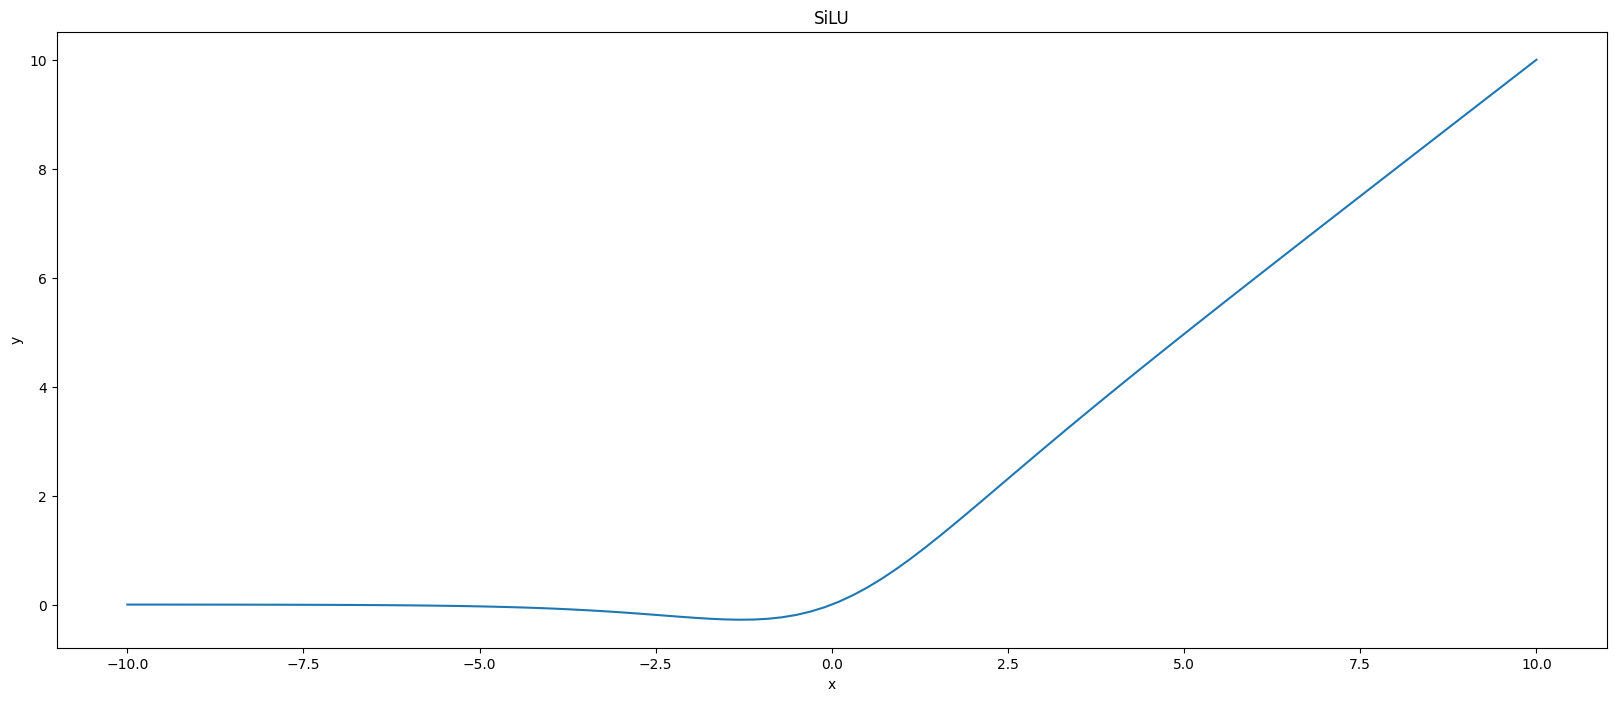

In [39]:
x = torch.linspace(-10, 10, 100)
y = torch.nn.SiLU()(x)

plt.figure(figsize=(20,8))
plt.plot(x,y)
plt.title("SiLU")
plt.xlabel("x")
plt.ylabel("y")
plt.show()